In [1]:
import os
import numpy as np
from PIL import Image
import cv2

import sys
sys.path.append('../../src/models')
from predict import SegmentationModel

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model_path, scale, clahe = '../../models/aiedge_v3_clahe/model_epoch_93', 0.5, True
mean_path = '../../data/aiedge/mean.npy'
mean = np.load(mean_path)

model = SegmentationModel(model_path, mean, scale=scale, clahe=clahe)

In [3]:
def visualize(image, mask, score, figsize=(12, 12)):
    fig = plt.figure(figsize=figsize)
    plt.imshow(mask)
    plt.show()
    
    overlay = (image * 0.5 + mask * 0.5).astype(np.uint8)
    fig = plt.figure(figsize=figsize)
    plt.imshow(overlay)
    plt.show()
    
    fig = plt.figure(figsize=figsize)
    plt.imshow(image)
    plt.show()

def apply_segmentation(image_path):
    pil_image = Image.open(image_path)
    image = np.asarray(pil_image, dtype=np.uint8)
    
    score, mask = model.apply_segmentation(pil_image)
    visualize(image, mask, score)

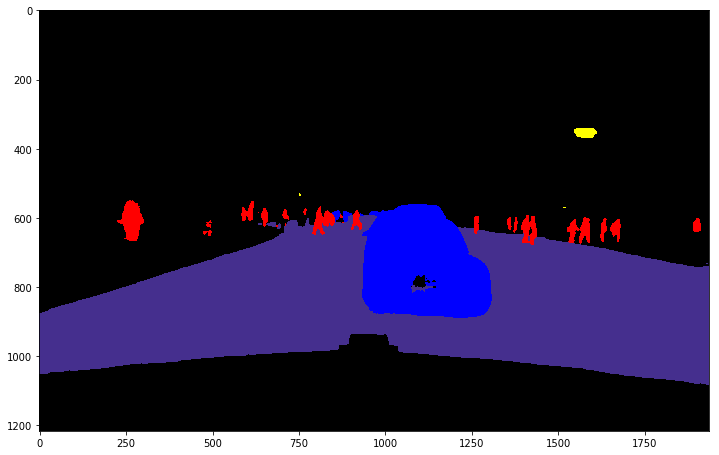

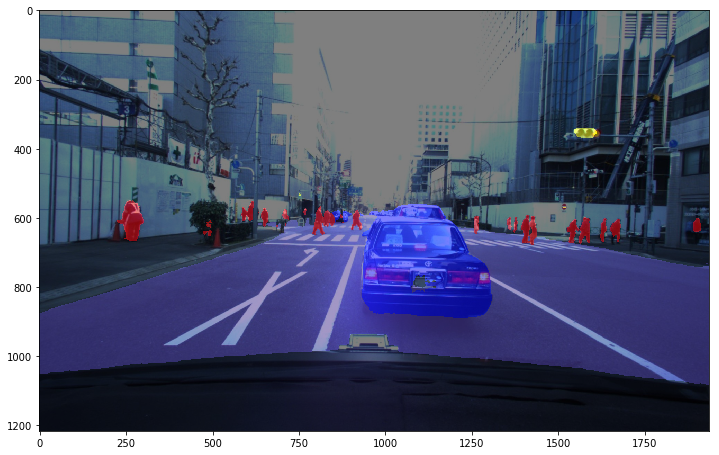

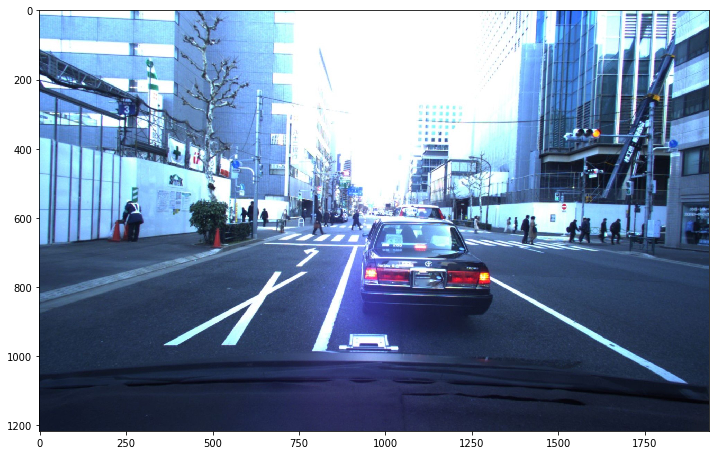

In [4]:
test_dir = '../../data/aiedge/seg_test_images'
test_images = os.listdir(test_dir)
test_images.sort()

idx = 217
path = os.path.join(test_dir, test_images[idx])
apply_segmentation(path)